In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
alle = pd.read_excel('/Users/berkay/Desktop/Data Science/WIFO/alltogether.xlsx')

In [63]:
alle.head()

,Age,Sex,City,Marial Status,Education,Working,Sector,Working Type,Experience,Income,...,YOUTUBE,Youtube review videoları,Youtube ürün incelemeleri.,Youtube’da review eden yabancı youtuberlar,Ürün katalogları,Ürün üzerindeki bilgi etiketleri,Ürün/hizmet hakkında bilgi veren internet siteleri,İhtiyac,"İlan Panoları, el ilanları, afişler v.b.",İnstagram sayfaları ve youtube
0,2,1,47,2,4,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,46,2,3,1,101,101,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,46,2,4,1,102,102,4,3,...,0,0,0,0,0,0,0,0,0,0
3,2,1,46,2,4,0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,0
4,2,1,46,2,4,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0


In [64]:
alle.columns

Index(['Age', 'Sex', 'City', 'Marial Status', 'Education', 'Working', 'Sector',
       'Working Type', 'Experience', 'Income',
       ...
       'YOUTUBE', 'Youtube review videoları', 'Youtube ürün incelemeleri.',
       'Youtube’da review eden yabancı youtuberlar', 'Ürün katalogları',
       'Ürün üzerindeki bilgi etiketleri',
       'Ürün/hizmet hakkında bilgi veren internet siteleri', 'İhtiyac',
       'İlan Panoları, el ilanları, afişler v.b.',
       'İnstagram sayfaları ve youtube'],
      dtype='object', length=174)

## T-Test

In [60]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):# calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    degf = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, degf)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), degf)) * 2.0
    # return everything
    return t_stat, degf, cv, p

In [61]:
def interpreting(t_stat,cv,p,alpha=0.05):
    # interpret via critical value
    if abs(t_stat) <= cv:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')
    # interpret via p-value
    if p > alpha:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')

In [62]:
a = alle.City[alle.Sex==1]
b = alle.Trendyol[alle.Sex==1]
t_stat, degf, cv, p = independent_ttest(a,b, alpha==0.05)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
interpreting(t_stat,cv,p,alpha)

t=69.140, df=1472, cv=-inf, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [75]:
bir= alle['aliexpress'][alle.Sex==2]
iki = alle.Sex[alle.Sex==2]
t_stat, df, cv, p = independent_ttest(bir,iki,alpha==0.05)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
interpreting(t_stat,cv,p,alpha)

t=-43.592, df=876, cv=-inf, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [72]:
for i in alle.columns:
    print(i)

Age
Sex
City
Marial Status
Education
Working
Sector
Working Type
Experience
Income
Abroad Ex
Abroad year
12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?
Research before purchase
Akıllı Cep Telefonu
Dizüstü Bilgisayar
Masaüstü Bilgisayar
Tablet
Aldığım bazı ürünlerin sadece online olarak satılması
Alisveris merkezine gitmemek icin
Alış veriş yapmasını sevmiyorum. Zorunluluk olmadıkça yapmamaya çalışıyorum
Alış verişe gitmekten hoşlanmıyorum
Alışveriş için yol ve zaman tasarrufu
Alışveriş merkezi kalabalığına girmemek ve elimde eşya taşımamak
Alışverişe çıkmaktan nefret etme
Aradığım ürünün olduğum şehirde bulunmaması
Bir yere gitmek zorunda olmadan alışveriş yapmak
Bulunduğum yerden hareket etmek zorunda olmama
Daha fazla ödeme seçeceği
Daha fazla ürün seçeneği
Daha güvenilir olması 
Daha hızlı alışveriş yapmak
Daha kolay olması
Daha kolay olması, oturduğun yerden yapabilmek
Daha sağlam gelmesi
Denemekle ugrasmamak icin..
Denenmemis urun alabilmek
Direkt depodan temiz gelmesi.
Fiyat k

In [80]:
from scipy import stats
bir= alle['Income']
iki = alle["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"]
stats.ttest_ind(bir,iki)

Ttest_indResult(statistic=-14.928780111725402, pvalue=3.2336546718068886e-48)

In [81]:
from scipy import stats
bir= alle['Sex']
iki = alle["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"]
stats.ttest_ind(bir,iki)

Ttest_indResult(statistic=-58.082757440790886, pvalue=0.0)

# Working Examples

## Independent Sample T-Test between Sex and Working

In [5]:
from scipy import stats

bir= alle['Sex']
iki = alle["Income"]
stats.ttest_ind(bir,iki)

Ttest_indResult(statistic=-67.48909825784962, pvalue=0.0)

Text(0.5, 1.0, 'Independent Sample T-Test between Sex and Income')

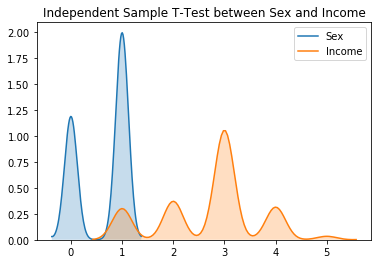

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(bir, shade=True)
sns.kdeplot(iki, shade=True)
plt.title("Independent Sample T-Test between Sex and Income")

## Independent Sample T-Test between Sex and Bank Card

In [101]:
from scipy import stats
bir= alle['Sex']
iki = alle["Banka Kartı"]
stats.ttest_ind(bir,iki)

Ttest_indResult(statistic=-0.7274302298441252, pvalue=0.46703490421462124)

Text(0.5, 1.0, 'Independent Sample T-Test between Sex and Bank Card')

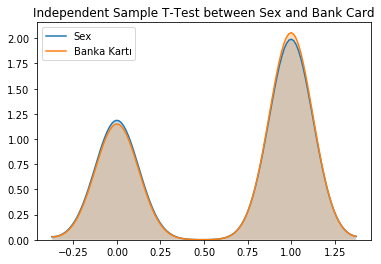

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(bir, shade=True)
sns.kdeplot(iki, shade=True)
plt.title("Independent Sample T-Test between Sex and Bank Card")

## Independent Sample T-Test between Sex and Online Shopping Frequency

In [108]:
sex_and_frequency=alle[["Sex","12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"]]

In [111]:
for i in range(0,len(sex_and_frequency)):
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==1:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=0
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==2:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=0
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==3:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=0
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==4:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=1
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==5:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=1
    if sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]==6:
        sex_and_frequency["12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?"][i]=1

/Users/berkay/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [122]:
sex_and_frequency.rename(columns={"12. Ne sıklıkla çevrimici alışveriş yapıyorsunuz?":"Online Shopping Frequency"},inplace=True)

/Users/berkay/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
from scipy import stats
sex= sex_and_frequency['Sex']
freq = sex_and_frequency["Online Shopping Frequency"]
stats.ttest_ind(sex,freq)

Ttest_indResult(statistic=6.201186292860187, pvalue=6.600285000459895e-10)

Text(0.5, 1.0, 'Independent Sample T-Test between Sex and  Online Shopping Frequency')

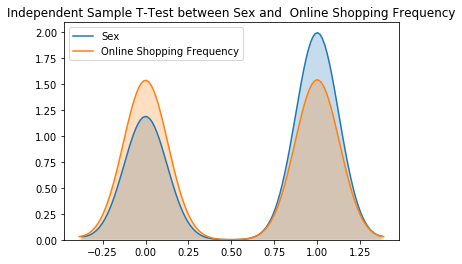

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(sex, shade=True)
sns.kdeplot(freq, shade=True)
plt.title("Independent Sample T-Test between Sex and  Online Shopping Frequency")

## Independent Sample T-Test between Working and Online Shopping Frequency

In [20]:
alle.columns

Index(['Age', 'Sex', 'City', 'Marial Status', 'Education', 'Working', 'Sector',
       'Working Type', 'Experience', 'Income',
       ...
       'YOUTUBE', 'Youtube review videoları', 'Youtube ürün incelemeleri.',
       'Youtube’da review eden yabancı youtuberlar', 'Ürün katalogları',
       'Ürün üzerindeki bilgi etiketleri',
       'Ürün/hizmet hakkında bilgi veren internet siteleri', 'İhtiyac',
       'İlan Panoları, el ilanları, afişler v.b.',
       'İnstagram sayfaları ve youtube'],
      dtype='object', length=174)

In [21]:
working_and_frequency=alle[["Working","Online Shopping Frequency"]]

In [22]:
working_and_frequency

,Working,Online Shopping Frequency
0,0,2
1,1,2
2,1,4
3,0,4
4,0,2
...,...,...
1171,1,4
1172,1,2
1173,0,2
1174,0,3


In [27]:
from scipy import stats
working= working_and_frequency['Working']
freq = working_and_frequency["Online Shopping Frequency"]
stats.ttest_ind(working,freq)

Ttest_indResult(statistic=-85.5046945056251, pvalue=0.0)

Text(0.5, 1.0, 'Independent Sample T-Test between Working and  Online Shopping Frequency')

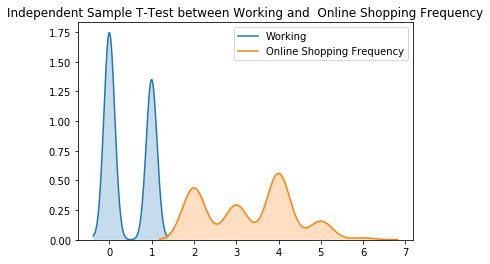

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(working, shade=True)
sns.kdeplot(freq, shade=True)
plt.title("Independent Sample T-Test between Working and  Online Shopping Frequency")

In [30]:
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
a= working_and_frequency['Working']
b = working_and_frequency["Online Shopping Frequency"]
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
N=len(a)
#std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -85.50469450562443
p = 2.0
t = -85.5046945056251
p = 0.0


In [39]:
working_and_frequency["Working"].describe()

count    1176.000000
mean        0.436224
std         0.496127
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Working, dtype: float64

In [46]:
print(working_and_frequency[working_and_frequency["Working"]==0].describe())
print(working_and_frequency[working_and_frequency["Working"]==1].describe())

       Working  Online Shopping Frequency
count    663.0                 663.000000
mean       0.0                   3.177979
std        0.0                   0.996215
min        0.0                   2.000000
25%        0.0                   2.000000
50%        0.0                   3.000000
75%        0.0                   4.000000
max        0.0                   6.000000
       Working  Online Shopping Frequency
count    513.0                 513.000000
mean       1.0                   3.528265
std        0.0                   1.084191
min        1.0                   2.000000
25%        1.0                   3.000000
50%        1.0                   4.000000
75%        1.0                   4.000000
max        1.0                   6.000000


#### Example

In [48]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as statsmodelsweightstats
% matplotlib inline

UsageError: Line magic function `%` not found.


In [47]:
working_and_frequency.head()

,Working,Online Shopping Frequency
0,0,2
1,1,2
2,1,4
3,0,4
4,0,2


In [49]:
alpha = 0.05

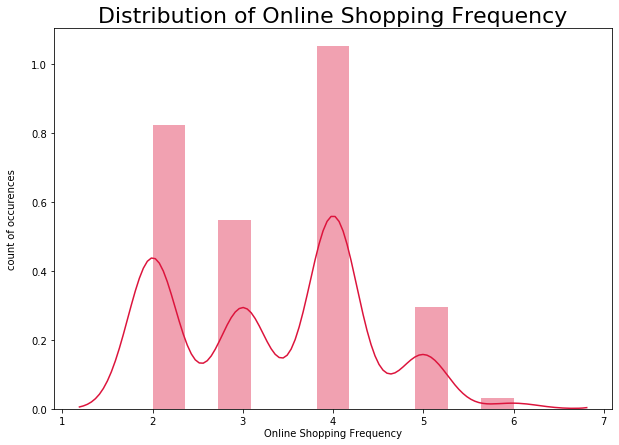

In [53]:
plt.figure(figsize=(10, 7))
sns.distplot(working_and_frequency["Online Shopping Frequency"], color='crimson')
plt.title("Distribution of Online Shopping Frequency", y=1, fontsize=22)
plt.xlabel("Online Shopping Frequency", labelpad=2)
plt.ylabel("count of occurences", labelpad=14);

In [54]:
a= working_and_frequency['Working']
b = working_and_frequency["Online Shopping Frequency"]
lena= len(a)
lenb= len(b)

In [55]:
degrees_of_freedom = lena + lenb - 2
degrees_of_freedom

2350

In [56]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(stats.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom), 3)
t_critical

-1.961

In [57]:
stats.ttest_ind(a, b=b, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-85.50469450562507, pvalue=0.0)

## Independent Sample T-Test between Sex and Sportif Ticket

In [142]:
from scipy import stats
bir= alle['Sex']
iki = alle["Sportif ve Kültürel Faaliyet Biletleri"]
stats.ttest_ind(bir,iki)

Ttest_indResult(statistic=20.05564231237555, pvalue=1.0193069216008679e-82)

In [15]:
alle["YOUTUBE"].describe()

count    1176.000000
mean        0.000850
std         0.029161
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: YOUTUBE, dtype: float64

##  T-Test between Age and  Online Shopping Frequency

In [10]:
working_and_frequency=alle[["Working","Online Shopping Frequency"]]

In [11]:
working_and_frequency["Online Shopping Frequency"].unique()

array([2, 4, 5, 6, 3])

In [12]:
for i in range(0,len(working_and_frequency)):
    if working_and_frequency["Online Shopping Frequency"][i]<4:
        working_and_frequency["Online Shopping Frequency"][i]=0
    else:
        working_and_frequency["Online Shopping Frequency"][i]=1
   

/Users/berkay/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
working_and_frequency

,Working,Online Shopping Frequency
0,0,0
1,1,0
2,1,1
3,0,1
4,0,0
...,...,...
1171,1,1
1172,1,0
1173,0,0
1174,0,0


In [166]:
for i in range(0,len(age_and_frequency)):
    if age_and_frequency["Age"][i]<=3:
        age_and_frequency["Age"][i]=0
    else:
        age_and_frequency["Age"][i]=1
   

In [9]:
from scipy import stats
age= working_and_frequency['Working']
freq = working_and_frequency["Online Shopping Frequency"]
stats.ttest_ind(age,freq)

Ttest_indResult(statistic=-85.5046945056251, pvalue=0.0)

In [167]:
from scipy import stats
age= age_and_frequency['Age']
freq = age_and_frequency["Online Shopping Frequency"]
stats.ttest_ind(age,freq)

Ttest_indResult(statistic=-20.236252961824235, pvalue=4.544802034651928e-84)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

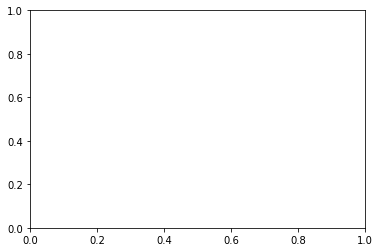

In [168]:
sns.kdeplot(age, shade=True)
sns.kdeplot(freq, shade=True)
plt.title("Independent Sample T-Test between Age and Online Shopping Frequency")

# Chi squares

In [45]:
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import chi2
df = pd.read_excel('alltogether.xlsx')

sexArray = []
incomeArray = []
workingArray = []


numberOfWoman = 0
numberOfMan = 0
numberOfWorking = 0
numberOfNotWorking = 0

for i in df.Sex:
    
    if(i == 2):
        numberOfMan = numberOfMan + 1
    elif(i == 1):
        numberOfWoman = numberOfWoman + 1
        
print("numberOfMan:", numberOfMan, " numberOfWoman: ", numberOfWoman )

for i in df.Working:
    
    if(i == 0):
        numberOfNotWorking = numberOfNotWorking + 1
    elif(i == 1):
        numberOfWorking = numberOfWorking + 1
        
print("numberOfWorking:", numberOfWorking, " numberOfNotWorking: ", numberOfNotWorking )


table = [	[numberOfWoman, numberOfMan],
			[numberOfWorking, numberOfNotWorking] ]



def chisquare(table):
    # chi-squared test with similar proportions
   
    #print(table)
    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
    	print('Dependent (reject H0)')
    else:
    	print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
    	print('Dependent (reject H0)')
    else:
    	print('Independent (fail to reject H0)')
chisquare(table)

numberOfMan: 439  numberOfWoman:  737
numberOfWorking: 513  numberOfNotWorking:  663
probability=0.950, critical=3.841, stat=84.909
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [194]:
from scipy.stats import chisquare
bir= alle['Income']
iki = alle["Online Shopping Frequency"]
a= np.array([bir,iki])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(a)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
316.7980279788569


===Degrees of Freedom===
1175


===P-Value===
1.0


===Contingency Table===
[[1.79665307 1.3474898  3.14414288 ... 2.24581634 2.69497961 2.69497961]
 [2.20334693 1.6525102  3.85585712 ... 2.75418366 3.30502039 3.30502039]]


In [195]:
stats.chi2_contingency(a)

(316.7980279788569,
 1.0,
 1175,
 array([[1.79665307, 1.3474898 , 3.14414288, ..., 2.24581634, 2.69497961,
         2.69497961],
        [2.20334693, 1.6525102 , 3.85585712, ..., 2.75418366, 3.30502039,
         3.30502039]]))

In [190]:
stats.chisquare(bir,iki)

/Users/berkay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

## Descriptive

In [59]:
alle["Age"].describe()

count    1176.000000
mean        2.460884
std         0.957035
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Age, dtype: float64

In [60]:
alle["City"].describe()

count    1176.000000
mean       38.565476
std        13.591391
min         0.000000
25%        36.000000
50%        46.000000
75%        46.000000
max        48.000000
Name: City, dtype: float64

In [61]:
alle

,Age,Sex,City,Marial Status,Education,Working,Sector,Working Type,Experience,Income,...,YOUTUBE,Youtube review videoları,Youtube ürün incelemeleri.,Youtube’da review eden yabancı youtuberlar,Ürün katalogları,Ürün üzerindeki bilgi etiketleri,Ürün/hizmet hakkında bilgi veren internet siteleri,İhtiyac,"İlan Panoları, el ilanları, afişler v.b.",İnstagram sayfaları ve youtube
0,2,1,47,2,4,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,46,2,3,1,101,101,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,46,2,4,1,102,102,4,3,...,0,0,0,0,0,0,0,0,0,0
3,2,1,46,2,4,0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,0
4,2,1,46,2,4,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2,1,13,2,5,1,117,105,1,4,...,0,0,0,0,0,1,0,0,0,0
1172,2,1,11,2,4,1,120,105,1,2,...,0,0,0,0,0,0,0,0,0,0
1173,2,1,46,2,4,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
1174,2,1,46,2,4,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
